In [1]:
import numpy as np
from numpy import genfromtxt

preprocessed_data = genfromtxt('data/preprocessed_data.csv', delimiter=',', dtype = str)

In [2]:
summary_list = []

for row in preprocessed_data:
    if row[10] not in summary_list:
        summary_list.append(row[10])

print(len(summary_list))
print(summary_list)

34
['"""Clear"""', '"""Partly Cloudy"""', '"""Overcast"""', '"""Humid and Mostly Cloudy"""', '"""Humid and Overcast"""', '"""Humid and Partly Cloudy"""', '"""Humid"""', '"""Mostly Cloudy"""', '"""Rain"""', '"""Heavy Rain"""', '"""Possible Light Rain"""', '"""Foggy"""', '"""Light Rain"""', '"""Breezy"""', '"""Breezy and Partly Cloudy"""', '"""Breezy and Mostly Cloudy"""', '"""Drizzle"""', '"""Heavy Rain and Breezy"""', '"""Rain and Breezy"""', '"""Light Rain and Breezy"""', '"""Heavy Rain and Windy"""', '"""Possible Drizzle"""', '"""Humid and Foggy"""', '"""Dry"""', '"""Breezy and Overcast"""', '"""Possible Light Rain and Humid"""', '"""Possible Drizzle and Humid"""', '"""Rain and Humid"""', '"""Windy and Mostly Cloudy"""', '"""Light Rain and Humid"""', '"""Drizzle and Humid"""', '"""Heavy Rain and Humid"""', '"""Possible Light Sleet"""', '"""Light Sleet"""']


In [3]:
summary_enum = dict()
count = 0
for s in summary_list:
    summary_enum[s] = count
    count += 1


In [4]:
print(len(preprocessed_data[0]))
#year, month, day, hour, house_id, hourly_kwh, hourly_solar_kwh, hourly_gal,latitude, longitude, summary, temperature, humidity, visibility, apparent_temperature, pressure, wind_speed, cloud_cover,wind_bearing, precip_intensity, precip_probability

21


In [101]:
x_indices = [3, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y_indices = [5, 6]
#x_indices = [3, 11]
#y_indices = [5]

In [102]:
x = []
y = []

for row in preprocessed_data:
    temp_x_list = []
    temp_y_list = []
    for i in range(len(row)):
        if i in x_indices:
            temp_x_list.append(float(row[i]))
        if i in y_indices:
            temp_y_list.append(float(row[i]))
    x.append(temp_x_list)
    y.append(temp_y_list)

In [103]:
x_ray = np.array(x)
y_ray = np.array(y)

print(x_ray.shape)
print(y_ray.shape)

(922747, 12)
(922747, 2)


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x_ray, y_ray)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(692060, 12)
(230687, 12)
(692060, 2)
(230687, 2)


In [106]:
def ridge(x, y, lam):
    """This function does ridge regression with the stimuli x and responses y with
    ridge parameter lam (short for lambda). It returns the weights.
    This is definitely not the most efficient way to do this, but it's fine for now.
    """
    n_features = x.shape[1]
    beta_ridge = np.linalg.inv(x.T.dot(x) + lam * np.eye(n_features)).dot(x.T).dot(y)
    return beta_ridge

In [107]:
def mse(array1, array2):
    difference_array = np.subtract(array1, array2)
    squared_array = np.square(difference_array)
    mse = squared_array.mean()
    return mse

In [108]:
import matplotlib.pyplot as plt

In [109]:
n_training, n_features = X_train.shape

n_mc_iters = 50 # let's do 50 Monte Carlo iterations
n_per_mc_iter = 50 # on each MC iteration, hold out 50 datapoints to be the validation set

lambdas = np.logspace(-3, 10, 30)
val_mses = np.zeros((n_training, len(lambdas)))

indices = np.arange(X_train.shape[0])

for it in range(n_mc_iters):
    # split the training dataset into two parts: one with a random selection of n_per_mc_iter points
    # and one with all the other datapoints
    
    subindices = np.random.choice(indices, n_per_mc_iter, replace = False)
    
    x_trn = np.delete(X_train, subindices, 0)
    y_trn = np.delete(y_train, subindices, 0)
    
    
    x_val = np.take(X_train, subindices, 0)
    y_val = np.take(y_train, subindices, 0)
    
    for ii in range(len(lambdas)):
        # fit model using x_trn & predict y_val
        # predict y_val
        y_val_hat = x_val.dot(ridge(x_trn, y_trn, lambdas[ii]))
        
        # store squared error in val_mses
        val_mses[it,ii] = mse(y_val, y_val_hat)



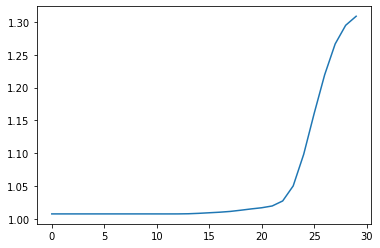

In [110]:
# Plot the MSE for each lambda, averaged across the MC iterations

plt.figure()
plt.plot(np.sum(val_mses, axis = 0)/n_mc_iters)

In [111]:
# Choose the best lambda, print it
best_lambda = np.argmin(np.sum(val_mses, axis = 0)/n_mc_iters)
print("Best lambda:", best_lambda)

# Fit a model using the whole training set and the best lambda
beta_hat = ridge(X_train, y_train, lambdas[best_lambda])

# Use that model to predict y_test
y_test_hat = X_test.dot(beta_hat)

# Compute the MSE, print it
test_mse = mse(y_test, y_test_hat)

print("Test MSE:", test_mse)

Best lambda: 11
Test MSE: 1.0684464786121066


In [112]:
print(beta_hat)

[[ 2.32379158e-02 -1.51091889e-02]
 [ 1.66213600e-04 -2.72294898e-05]
 [-2.34786679e-02 -2.02191597e-02]
 [ 6.25110067e-01 -1.77138818e+00]
 [-1.72068708e-03 -3.17939045e-02]
 [ 4.12902010e-02  2.90791998e-02]
 [-1.02694784e-03  1.17424858e-03]
 [ 5.87897937e-03  1.17382862e-02]
 [-1.11681563e-01  2.92662793e-01]
 [-3.16999015e-04  5.29178077e-04]
 [ 1.43896501e-02 -6.65909230e-01]
 [ 1.11607739e-01  9.06676289e-02]]


In [113]:
test800 = []
y_800 = []
for row in preprocessed_data[2200:3000]:
    temp_x_list = []
    temp_y_list = []
    for i in range(len(row)):
        if i in x_indices:
            temp_x_list.append(float(row[i]))
        if i in y_indices:
            temp_y_list.append(float(row[i]))
    test800.append(temp_x_list)
    y_800.append(temp_y_list)
print(len(test800))
test800 = np.array(test800)
y_800 = np.array(y_800)
y_hat_800 = test800.dot(beta_hat)
temp_mse = mse(y_800, y_hat_800)
print("Test MSE:", temp_mse)



800
Test MSE: 1.3499600937780971


In [114]:
import csv

with open('y_hat_800.csv', 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(y_hat_800)

In [97]:
predict_raw_data = genfromtxt('data/test_kwh.csv', delimiter=',', dtype = str)

In [98]:

predict_data = []
skip_head = True

for row in predict_raw_data:
	if skip_head:
		skip_head = False
		continue
	temp_list = []
	time = row[0]
	hour = time.split(" ")[1].split(":")[0]
	temp_list.append(float(hour))
	temp_list.append(float(row[1]))
	temp_list.append(float(row[10]))
	temp_list.append(float(row[14]))
	temp_list.append(float(row[16]))
	temp_list.append(float(row[18]))
	temp_list.append(float(row[20]))
	temp_list.append(float(row[22]))
	temp_list.append(float(row[24]))
	temp_list.append(float(row[26]))
	temp_list.append(float(row[27]))
	temp_list.append(float(row[29]))
	predict_data.append(temp_list)

In [99]:
predict_data = np.array(predict_data)

In [100]:
# Use that model to predict
predictions = predict_data.dot(beta_hat)
np.savetxt('elec_2.kwh', predictions, delimiter=',') 

In [ ]:
2200-3000